In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from time import time

In [27]:
# Load the dataset from the Keras module
data = mnist.load_data()
print(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [28]:
# Identify the datatype of the dataset
print(type(data))
print(type(data[0]))
print(type(data[0][0]))

<class 'tuple'>
<class 'tuple'>
<class 'numpy.ndarray'>


In [29]:
# Data Exploration
(X_train, y_train), (X_test, y_test) = data
print("Train: X=%s, y=%s" % (X_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape, y_test.shape))
print("\nDigit Segregation in Training Set:")
for i in range(10):
    print(i,": ", y_train[y_train == i].shape[0])
print("\nDigit Segregation in Test Set:")
for i in range(10):
    print(i,": ", y_test[y_test == i].shape[0])

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)

Digit Segregation in Training Set:
0 :  5923
1 :  6742
2 :  5958
3 :  6131
4 :  5842
5 :  5421
6 :  5918
7 :  6265
8 :  5851
9 :  5949

Digit Segregation in Test Set:
0 :  980
1 :  1135
2 :  1032
3 :  1010
4 :  982
5 :  892
6 :  958
7 :  1028
8 :  974
9 :  1009


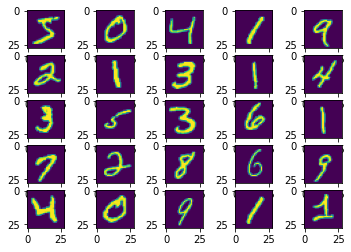

In [30]:
# Plot first few images
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [31]:
# Change Shape
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype("float32")
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype("float32")
print("Train: X=%s, y=%s" % (X_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape, y_test.shape))

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


In [32]:
# Downscaling the data to a range of 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [48]:
# Models
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC(random_state=0)))
models.append(("BNB", BernoulliNB()))
models.append(("CNB", ComplementNB()))
models.append(("MNB", MultinomialNB()))
models.append(("LR", LogisticRegression(random_state=0)))
models.append(("DT", DecisionTreeClassifier(random_state=0)))
models.append(("RF", RandomForestClassifier(random_state=0)))
models.append(("CGB", CatBoostClassifier(random_state=0)))
models.append(("XGB", XGBClassifier(random_state=0)))
models.append(("LGB", LGBMClassifier(random_state=0)))

In [34]:
# Storage and Control variables
s = len(models)
names = [0] * s
scores = [0] * s
times = [0] * s
i = 0

('KNN', KNeighborsClassifier())


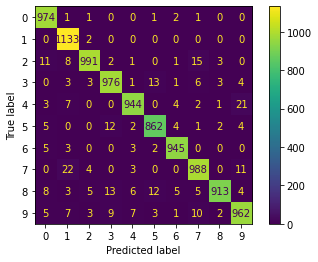

       Digit  Precision    Recall    FScore  Support
0          0   0.963403  0.993878  0.978403    980.0
1          1   0.954507  0.998238  0.975883   1135.0
2          2   0.982161  0.960271  0.971093   1032.0
3          3   0.964427  0.966337  0.965381   1010.0
4          4   0.976215  0.961303  0.968702    982.0
5          5   0.965286  0.966368  0.965826    892.0
6          6   0.981308  0.986430  0.983863    958.0
7          7   0.961089  0.961089  0.961089   1028.0
8          8   0.988095  0.937372  0.962065    974.0
9          9   0.956262  0.953419  0.954839   1009.0
10   Average   0.968800  0.968800  0.968800      NaN
11  Weighted   0.969021  0.968800  0.968747      NaN


In [35]:
# KNN
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('SVM', SVC(random_state=0))


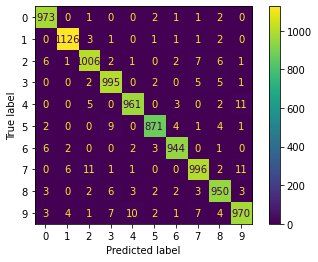

       Digit  Precision    Recall    FScore  Support
0          0   0.979859  0.992857  0.986315    980.0
1          1   0.988586  0.992070  0.990325   1135.0
2          2   0.975752  0.974806  0.975279   1032.0
3          3   0.974535  0.985149  0.979813   1010.0
4          4   0.982618  0.978615  0.980612    982.0
5          5   0.986410  0.976457  0.981408    892.0
6          6   0.985386  0.985386  0.985386    958.0
7          7   0.975514  0.968872  0.972182   1028.0
8          8   0.971370  0.975359  0.973361    974.0
9          9   0.971944  0.961348  0.966617   1009.0
10   Average   0.979200  0.979200  0.979200      NaN
11  Weighted   0.979201  0.979200  0.979186      NaN


In [49]:
# SVM
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('BNB', BernoulliNB())


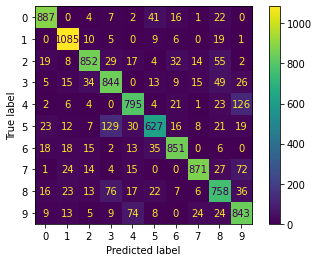

       Digit  Precision    Recall    FScore  Support
0          0   0.905102  0.905102  0.905102    980.0
1          1   0.901163  0.955947  0.927747   1135.0
2          2   0.889353  0.825581  0.856281   1032.0
3          3   0.763801  0.835644  0.798109   1010.0
4          4   0.825545  0.809572  0.817481    982.0
5          5   0.821756  0.702915  0.757704    892.0
6          6   0.888309  0.888309  0.888309    958.0
7          7   0.926596  0.847276  0.885163   1028.0
8          8   0.754980  0.778234  0.766431    974.0
9          9   0.749333  0.835481  0.790066   1009.0
10   Average   0.841300  0.841300  0.841300      NaN
11  Weighted   0.843773  0.841300  0.841303      NaN


In [37]:
# BNB
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('CNB', ComplementNB())


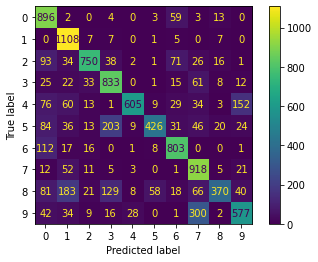

       Digit  Precision    Recall    FScore  Support
0          0   0.630542  0.914286  0.746356    980.0
1          1   0.715762  0.976211  0.825941   1135.0
2          2   0.859107  0.726744  0.787402   1032.0
3          3   0.673948  0.824752  0.741763   1010.0
4          4   0.922256  0.616090  0.738706    982.0
5          5   0.840237  0.477578  0.609006    892.0
6          6   0.777348  0.838205  0.806630    958.0
7          7   0.631362  0.892996  0.739726   1028.0
8          8   0.833333  0.379877  0.521862    974.0
9          9   0.696860  0.571853  0.628198   1009.0
10   Average   0.728600  0.728600  0.728600      NaN
11  Weighted   0.756129  0.728600  0.717463      NaN


In [38]:
# CNB
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('MNB', MultinomialNB())


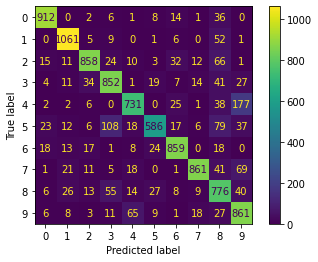

       Digit  Precision    Recall    FScore  Support
0          0   0.924012  0.930612  0.927300    980.0
1          1   0.910730  0.934802  0.922609   1135.0
2          2   0.898429  0.831395  0.863613   1032.0
3          3   0.795518  0.843564  0.818837   1010.0
4          4   0.844111  0.744399  0.791126    982.0
5          5   0.865583  0.656951  0.746973    892.0
6          6   0.885567  0.896660  0.891079    958.0
7          7   0.933839  0.837549  0.883077   1028.0
8          8   0.660988  0.796715  0.722533    974.0
9          9   0.709810  0.853320  0.774977   1009.0
10   Average   0.835700  0.835700  0.835700      NaN
11  Weighted   0.843924  0.835700  0.836453      NaN


In [39]:
# MNB
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('LR', LogisticRegression(random_state=0))


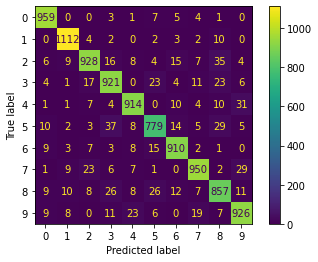

       Digit  Precision    Recall    FScore  Support
0          0   0.951389  0.978571  0.964789    980.0
1          1   0.962771  0.979736  0.971179   1135.0
2          2   0.930792  0.899225  0.914736   1032.0
3          3   0.895044  0.911881  0.903384   1010.0
4          4   0.935517  0.930754  0.933129    982.0
5          5   0.902665  0.873318  0.887749    892.0
6          6   0.935252  0.949896  0.942517    958.0
7          7   0.939664  0.924125  0.931829   1028.0
8          8   0.878974  0.879877  0.879425    974.0
9          9   0.915020  0.917740  0.916378   1009.0
10   Average   0.925600  0.925600  0.925600      NaN
11  Weighted   0.925485  0.925600  0.925445      NaN


In [40]:
# LR
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('DT', DecisionTreeClassifier(random_state=0))


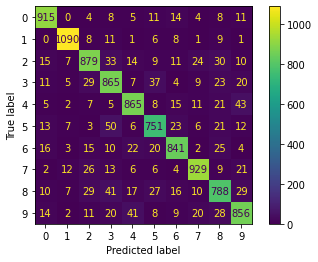

       Digit  Precision    Recall    FScore  Support
0          0   0.914086  0.933673  0.923776    980.0
1          1   0.960352  0.960352  0.960352   1135.0
2          2   0.869436  0.851744  0.860499   1032.0
3          3   0.819129  0.856436  0.837367   1010.0
4          4   0.879065  0.880855  0.879959    982.0
5          5   0.850510  0.841928  0.846197    892.0
6          6   0.889947  0.877871  0.883868    958.0
7          7   0.914370  0.903696  0.909002   1028.0
8          8   0.819127  0.809035  0.814050    974.0
9          9   0.850050  0.848365  0.849206   1009.0
10   Average   0.877900  0.877900  0.877900      NaN
11  Weighted   0.878035  0.877900  0.877894      NaN


In [41]:
# DT
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('RF', RandomForestClassifier(random_state=0))


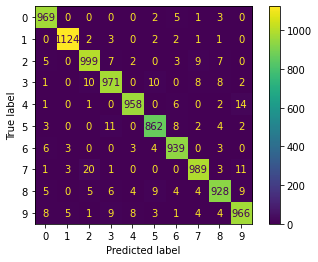

       Digit  Precision    Recall    FScore  Support
0          0   0.969970  0.988776  0.979282    980.0
1          1   0.990308  0.990308  0.990308   1135.0
2          2   0.962428  0.968023  0.965217   1032.0
3          3   0.963294  0.961386  0.962339   1010.0
4          4   0.982564  0.975560  0.979050    982.0
5          5   0.966368  0.966368  0.966368    892.0
6          6   0.970041  0.980167  0.975078    958.0
7          7   0.971513  0.962062  0.966764   1028.0
8          8   0.963655  0.952772  0.958183    974.0
9          9   0.962151  0.957384  0.959762   1009.0
10   Average   0.970500  0.970500  0.970500      NaN
11  Weighted   0.970503  0.970500  0.970482      NaN


In [42]:
# RF
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('CGB', <catboost.core.CatBoostClassifier object at 0x0000022085753DC0>)
Learning rate set to 0.097501
0:	learn: 2.0000537	total: 2.26s	remaining: 37m 39s
1:	learn: 1.8077927	total: 4.45s	remaining: 37m 1s
2:	learn: 1.6561870	total: 6.73s	remaining: 37m 17s
3:	learn: 1.5398948	total: 9.03s	remaining: 37m 29s
4:	learn: 1.4392984	total: 11.4s	remaining: 37m 39s
5:	learn: 1.3385143	total: 13.7s	remaining: 37m 50s
6:	learn: 1.2513720	total: 16.1s	remaining: 37m 57s
7:	learn: 1.1839052	total: 18.4s	remaining: 38m
8:	learn: 1.1195482	total: 20.8s	remaining: 38m 6s
9:	learn: 1.0614344	total: 23.1s	remaining: 38m 3s
10:	learn: 1.0052661	total: 25.4s	remaining: 38m 7s
11:	learn: 0.9590889	total: 27.7s	remaining: 38m 1s
12:	learn: 0.9149452	total: 30s	remaining: 38m 1s
13:	learn: 0.8804072	total: 32.4s	remaining: 38m
14:	learn: 0.8407541	total: 34.8s	remaining: 38m 5s
15:	learn: 0.8124875	total: 37.3s	remaining: 38m 10s
16:	learn: 0.7847183	total: 39.7s	remaining: 38m 14s
17:	learn: 0.7536690	to

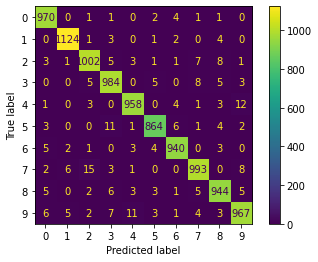

       Digit  Precision    Recall    FScore  Support
0          0   0.974874  0.989796  0.982278    980.0
1          1   0.987698  0.990308  0.989001   1135.0
2          2   0.970930  0.970930  0.970930   1032.0
3          3   0.964706  0.974257  0.969458   1010.0
4          4   0.977551  0.975560  0.976555    982.0
5          5   0.978482  0.968610  0.973521    892.0
6          6   0.980188  0.981211  0.980699    958.0
7          7   0.973529  0.965953  0.969727   1028.0
8          8   0.968205  0.969199  0.968702    974.0
9          9   0.968938  0.958375  0.963627   1009.0
10   Average   0.974600  0.974600  0.974600      NaN
11  Weighted   0.974603  0.974600  0.974586      NaN


In [43]:
# CGB
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('XGB', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None))
[18:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavio

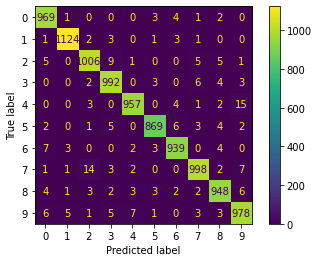

       Digit  Precision    Recall    FScore  Support
0          0   0.973869  0.988776  0.981266    980.0
1          1   0.990308  0.990308  0.990308   1135.0
2          2   0.974806  0.974806  0.974806   1032.0
3          3   0.973503  0.982178  0.977822   1010.0
4          4   0.984568  0.974542  0.979529    982.0
5          5   0.984145  0.974215  0.979155    892.0
6          6   0.980167  0.980167  0.980167    958.0
7          7   0.978431  0.970817  0.974609   1028.0
8          8   0.973306  0.973306  0.973306    974.0
9          9   0.966403  0.969277  0.967838   1009.0
10   Average   0.978000  0.978000  0.978000      NaN
11  Weighted   0.978026  0.978000  0.977999      NaN


In [44]:
# XGB
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

('LGB', LGBMClassifier(random_state=0))


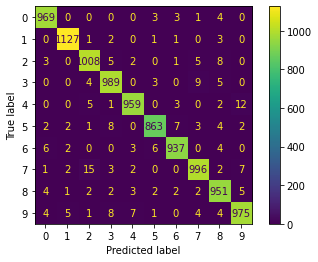

       Digit  Precision    Recall    FScore  Support
0          0   0.979778  0.988776  0.984256    980.0
1          1   0.989464  0.992952  0.991205   1135.0
2          2   0.972035  0.976744  0.974384   1032.0
3          3   0.971513  0.979208  0.975345   1010.0
4          4   0.982582  0.976578  0.979571    982.0
5          5   0.981797  0.967489  0.974591    892.0
6          6   0.982180  0.978079  0.980126    958.0
7          7   0.976471  0.968872  0.972656   1028.0
8          8   0.963526  0.976386  0.969913    974.0
9          9   0.974026  0.966303  0.970149   1009.0
10   Average   0.977400  0.977400  0.977400      NaN
11  Weighted   0.977426  0.977400  0.977395      NaN


In [45]:
# LGB
print(models[i])
start = time()
models[i][1].fit(X_train, y_train)
end = time()
y_pred = models[i][1].predict(X_test)
scores[i] = balanced_accuracy_score(y_test, y_pred)
names[i] = models[i][0]
times[i] = end - start
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
p1 = (np.asarray(precision_recall_fscore_support(y_test, y_pred))).tolist()
p2 = precision_recall_fscore_support(y_test, y_pred, average="micro")
p3 = precision_recall_fscore_support(y_test, y_pred, average="weighted")
digit = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Average", "Weighted"]
for j in range(4):
    p1[j].append(p2[j])
    p1[j].append(p3[j])
print(
    pd.DataFrame(
        {
            "Digit": digit,
            "Precision": p1[0],
            "Recall": p1[1],
            "FScore": p1[2],
            "Support": p1[3],
        }
    )
)
i=i+1

In [50]:
# Accuracy Scores
tr_split = pd.DataFrame({"Name": names, "Score": scores, "Time": times})
print(tr_split)

   Name     Score         Time
0   KNN  0.968471     0.123997
1   SVM  0.979092   239.454652
2   BNB  0.838406     0.532998
3   CNB  0.721859     0.239001
4   MNB  0.832597     0.217000
5    LR  0.924512    22.029591
6    DT  0.876396    24.924645
7    RF  0.970281    46.329018
8   CGB  0.974420  2344.524103
9   XGB  0.977839   554.738999
10  LGB  0.977139    77.138000


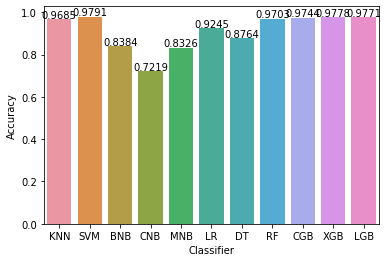

In [51]:
# Plot Accuracy Scores
axis = sns.barplot(x="Name", y="Score", data=tr_split)
axis.set(xlabel="Classifier", ylabel="Accuracy")
for p in axis.patches:
    height = p.get_height()
    axis.text(
        p.get_x() + p.get_width() / 2,
        height + 0.005,
        "{:1.4f}".format(height),
        ha="center",
    )
plt.show()